In [101]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [103]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)


class PerceptronModel:

    def  __init__(self, learning_rate=0.01,n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0


        y_ = np.where(y > 0 , 1, 0)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    


In [105]:
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
diabetes_df = df.copy(deep = True)
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [109]:
diabetes_df['Glucose'] = diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean())
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median())
diabetes_df['Insulin'] = diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median())
diabetes_df['BMI'] = diabetes_df['BMI'].fillna(diabetes_df['BMI'].median())

In [111]:
X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [115]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6428571428571429


In [119]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [125]:
X_train1 = np.array(X_train, dtype=float)
y_train1 = np.array(y_train, dtype=float)

gg = PerceptronModel(learning_rate=0.0001, n_iters=1000)
gg.fit(X_train1, y_train1)
predictions = gg.predict(X_test)
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 0.6688311688311688


C:\Users\Admin\AppData\Local\Temp\ipykernel_15240\4190456952.py:10: RuntimeWarning: invalid value encountered in scalar divide
  x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_15240\4190456952.py:11: RuntimeWarning: invalid value encountered in scalar divide
  x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]


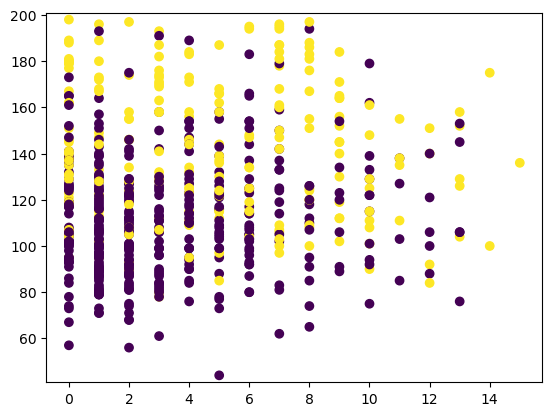

In [133]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train1[:, 0], X_train1[:, 1], marker="o", c=y_train1)

x0_1 = np.amin(X_train1[:, 0])
x0_2 = np.amax(X_train1[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train1[:, 1])
ymax = np.amax(X_train1[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()